## MultiClass Classification - iris, BestModel, EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
y_onehot = to_categorical(iris.target)
X_train, X_test, Y_train, Y_test = train_test_split(
    iris_std, y_onehot, stratify=y_onehot, test_size=0.2, random_state=seed
)

In [4]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential([ 
    Dense(12, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [6]:
mc = ModelCheckpoint('./models/iris_best.h5', monitor='val_loss',
                     verbose=1, save_best_only=True)
es = EarlyStopping(patience=30)


In [7]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=1000, batch_size=100, verbose=0,
                 callbacks=[mc,es])


Epoch 00001: val_loss improved from inf to 1.22967, saving model to ./models\iris_best.h5

Epoch 00002: val_loss improved from 1.22967 to 1.22161, saving model to ./models\iris_best.h5

Epoch 00003: val_loss improved from 1.22161 to 1.21356, saving model to ./models\iris_best.h5

Epoch 00004: val_loss improved from 1.21356 to 1.20554, saving model to ./models\iris_best.h5

Epoch 00005: val_loss improved from 1.20554 to 1.19754, saving model to ./models\iris_best.h5

Epoch 00006: val_loss improved from 1.19754 to 1.18948, saving model to ./models\iris_best.h5

Epoch 00007: val_loss improved from 1.18948 to 1.18150, saving model to ./models\iris_best.h5

Epoch 00008: val_loss improved from 1.18150 to 1.17360, saving model to ./models\iris_best.h5

Epoch 00009: val_loss improved from 1.17360 to 1.16575, saving model to ./models\iris_best.h5

Epoch 00010: val_loss improved from 1.16575 to 1.15808, saving model to ./models\iris_best.h5

Epoch 00011: val_loss improved from 1.15808 to 1.1504

In [8]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.1612 - accuracy: 0.9000


[0.16116969287395477, 0.8999999761581421]

In [9]:
best_model = load_model('./models/iris_best.h5')
best_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 99ms/step - loss: 0.1612 - accuracy: 0.9000


[0.16116969287395477, 0.8999999761581421]

In [10]:

y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

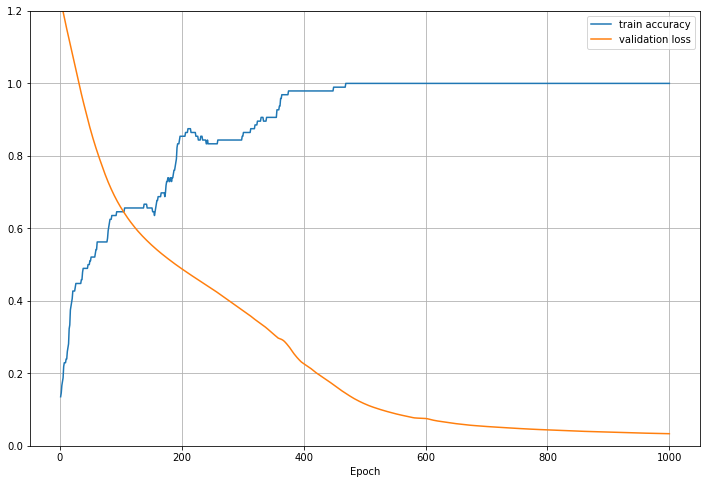

In [11]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()